In [1]:
import sys

sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

from fmpy import simulate_fmu

from devs_fmu.bouncing_ball import BouncingBall
from devs_fmu.simulator import simulator

from config import FMU_ROOT

In [3]:
def simulate_default():
    filename = FMU_ROOT / '2.0/BouncingBall.fmu'
    
    result = simulate_fmu(
        filename=filename,
        stop_time=3,
        fmi_type='CoSimulation'
    )
    
    return result

def plot_default_simulation(result):
    time_list = []
    height_list = []
    velocity_list = []
    for row in result:
        time_list.append(row[0])
        height_list.append(row[1])
        velocity_list.append(row[2])

    plt.plot(time_list, height_list)
    plt.show()

    plt.plot(time_list, velocity_list)
    plt.show()

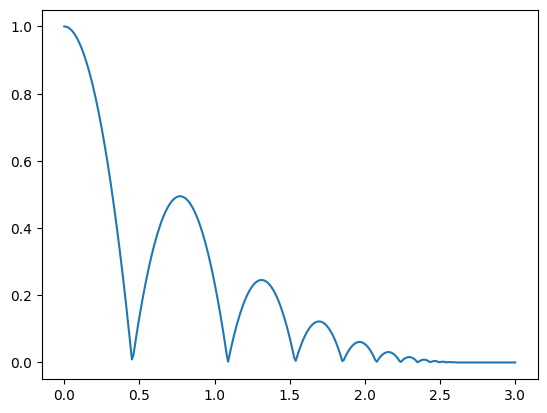

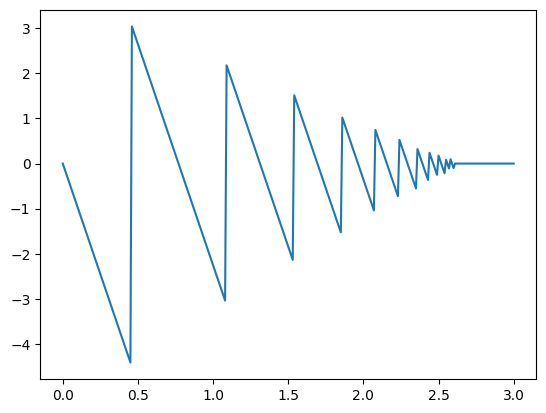

In [4]:
plot_default_simulation(simulate_default())

In [5]:
def plot_devs_simulation(time_list, height_list, velocity_list):
    plt.plot(time_list, height_list)
    plt.show()

    plt.plot(time_list, velocity_list)
    plt.show()

In [6]:
def simulate_devs():
    simulator.reset()
    m = BouncingBall()
    
    step_size = 1e-2
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

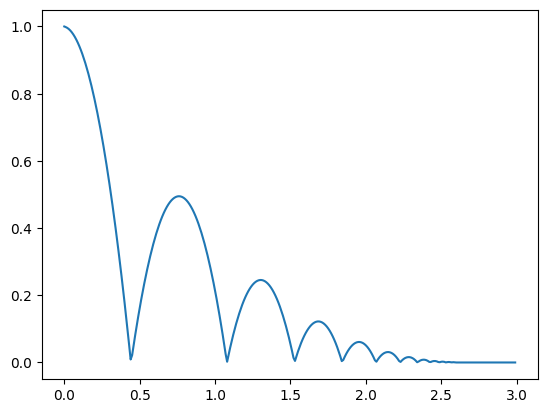

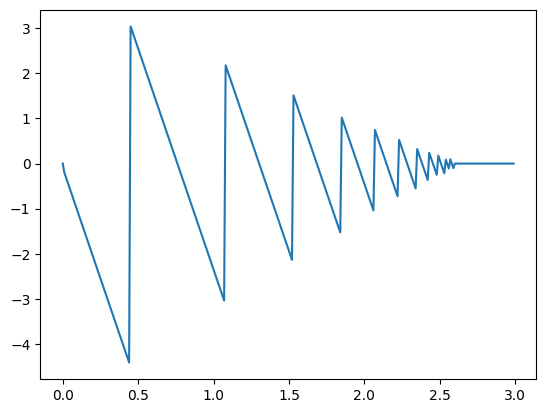

In [7]:
plot_devs_simulation(*simulate_devs())

In [8]:
def change_state(m):
    m.set_height(1)
    m.set_velocity(0)


def simulate_devs_with_change_state():
    simulator.reset()
    m = BouncingBall()
    
    simulator.schedule(
        timedelta(seconds=1),
        change_state,
        m
    )
        
    step_size = 1e-2
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

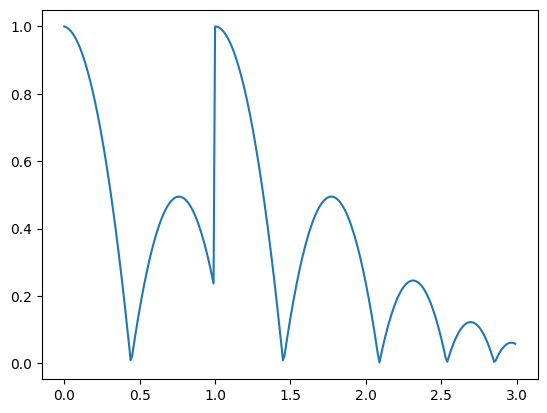

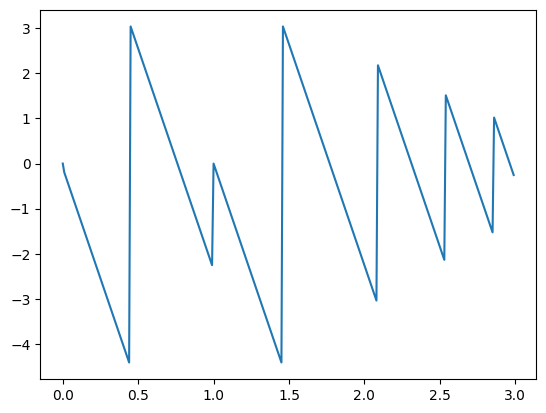

In [9]:
plot_devs_simulation(*simulate_devs_with_change_state())